In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
student_info = pd.read_csv('studentInfo.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_vle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

In [4]:
student_info = student_info[['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'disability']]
student_assessment = student_assessment[['id_student', 'id_assessment', 'date_submitted', 'is_banked', 'score']]
student_vle = student_vle[['code_module', 'code_presentation', 'id_student', 'id_site', 'sum_click']]

In [5]:
merged_df = pd.merge(student_info, student_assessment, on='id_student', how='inner')
merged_df = pd.merge(merged_df, student_vle, on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [6]:
merged_df.shape

(101769008, 16)

In [7]:
grouped_df = merged_df.groupby(['id_student', 'code_module', 'code_presentation', 'id_site']).agg({
    'gender': 'first',
    'region': 'first',
    'highest_education': 'first',
    'imd_band': 'first',
    'age_band': 'first',
    'num_of_prev_attempts' : 'first',
    'disability': 'first',
    'id_assessment': 'first',
    'date_submitted': 'first',
    'is_banked': 'first',
    'score': 'first',
    'sum_click': 'sum'
}).reset_index()

In [8]:
grouped_df.shape

(1920298, 16)

In [9]:
#size of the data
print("Number of rows: ", grouped_df.shape[0])
print("Number of columns: ", grouped_df.shape[1])

Number of rows:  1920298
Number of columns:  16


In [10]:
#checking missing values
print(grouped_df.isnull().sum())

id_student                   0
code_module                  0
code_presentation            0
id_site                      0
gender                       0
region                       0
highest_education            0
imd_band                106942
age_band                     0
num_of_prev_attempts         0
disability                   0
id_assessment                0
date_submitted               0
is_banked                    0
score                      352
sum_click                    0
dtype: int64


imd_band 106942 missing values / score 352 missing values, we may drop imd_band and try to use the median or mean for score, we'll see what we'll do

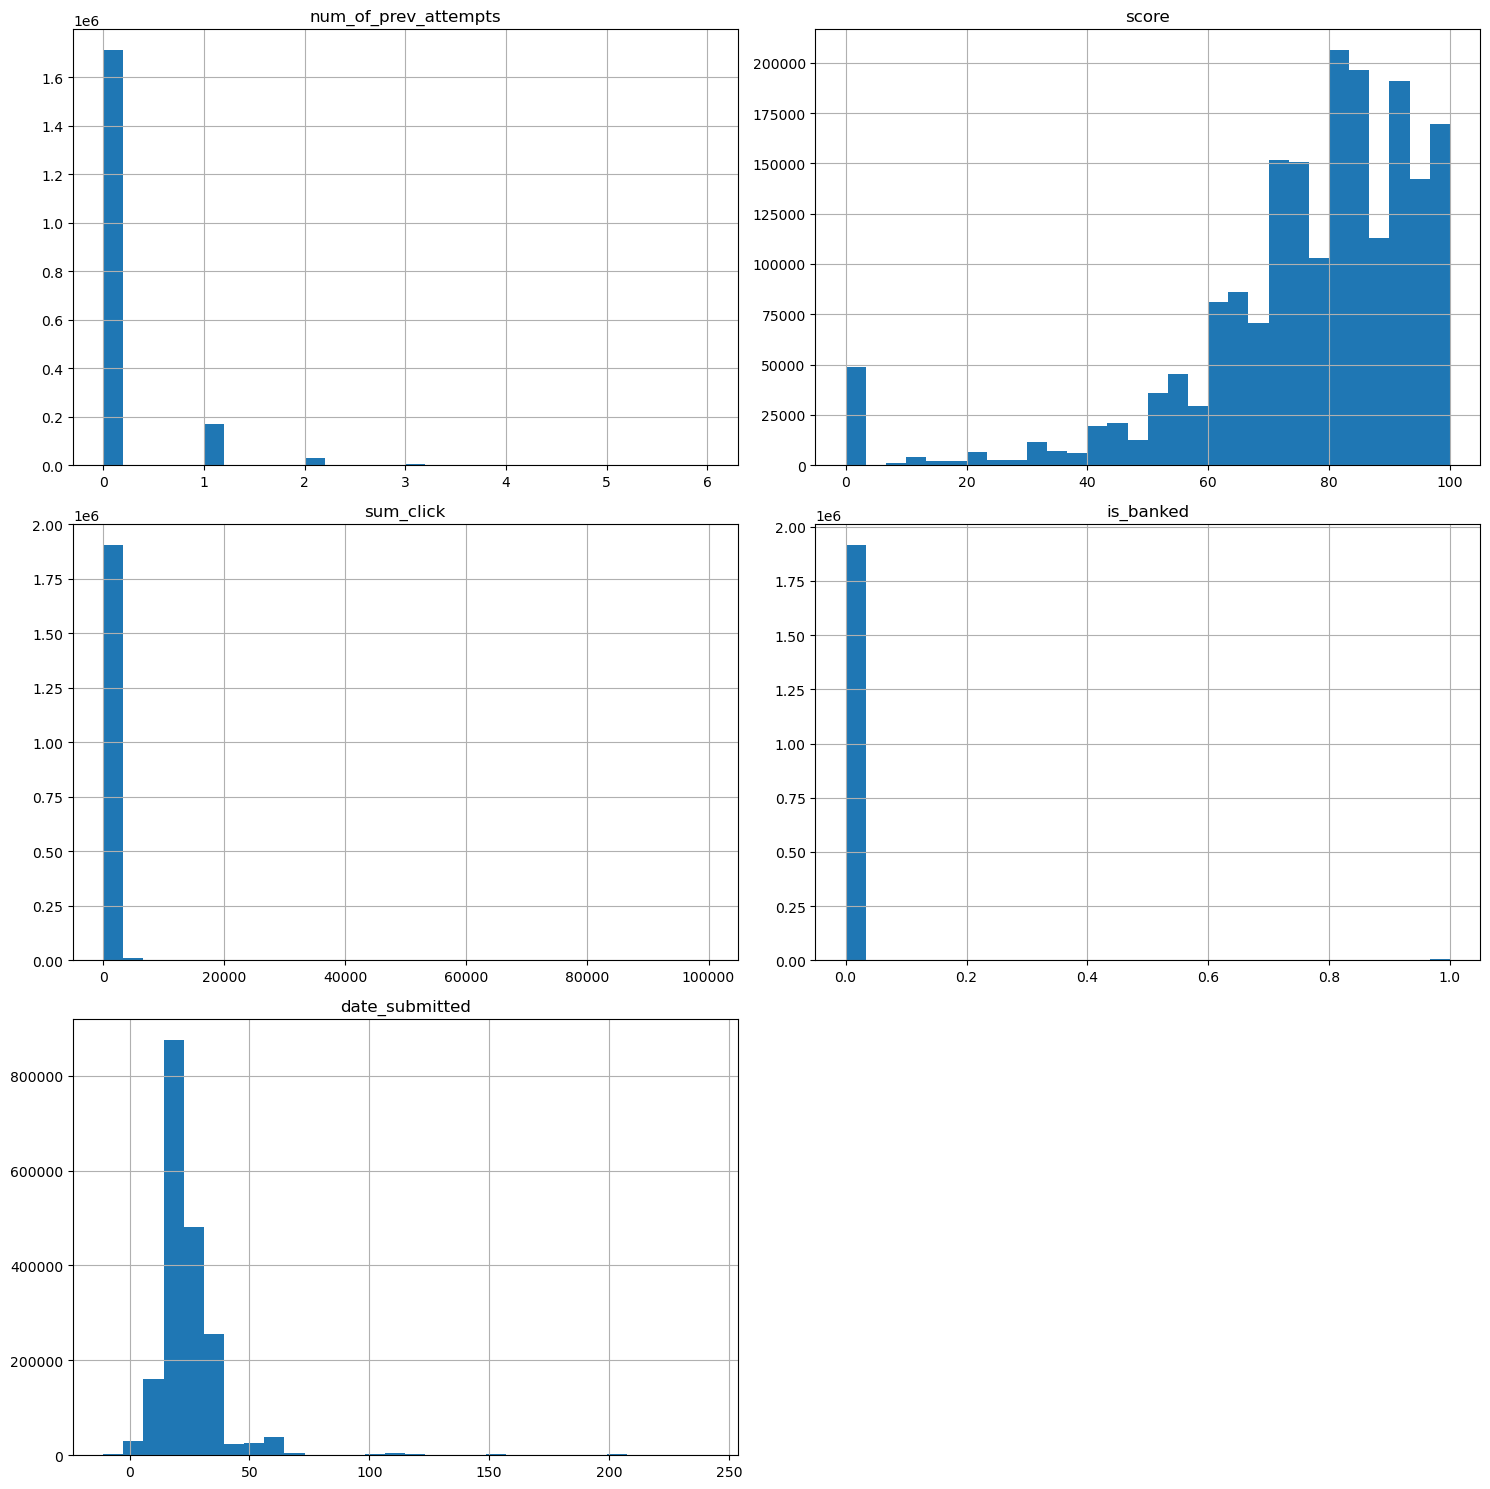

In [11]:
#checking the distribution of each column using histograms
included_cols = ['num_of_prev_attempts','score','sum_click','is_banked','date_submitted']
grouped_df[included_cols].hist(figsize=(15, 15), bins=30)
plt.tight_layout()
plt.show()

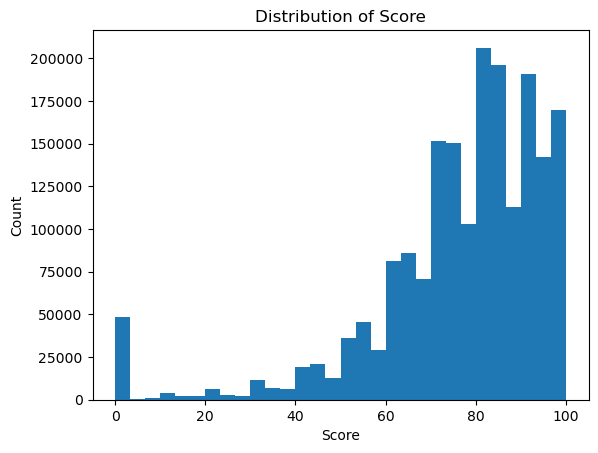

In [17]:
#Distribution of Score
plt.hist(grouped_df["score"], bins=30)
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

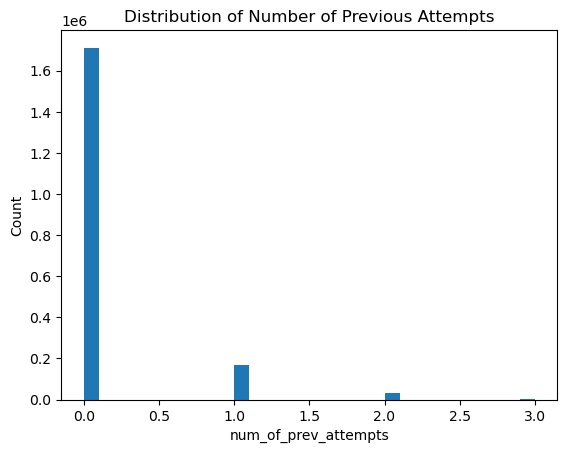

In [18]:
#Distribution of Number of Previous Attempts
plt.hist(grouped_df["num_of_prev_attempts"], bins=30, range=(0, 3))
plt.title("Distribution of Number of Previous Attempts")
plt.xlabel("num_of_prev_attempts")
plt.ylabel("Count")
plt.show()

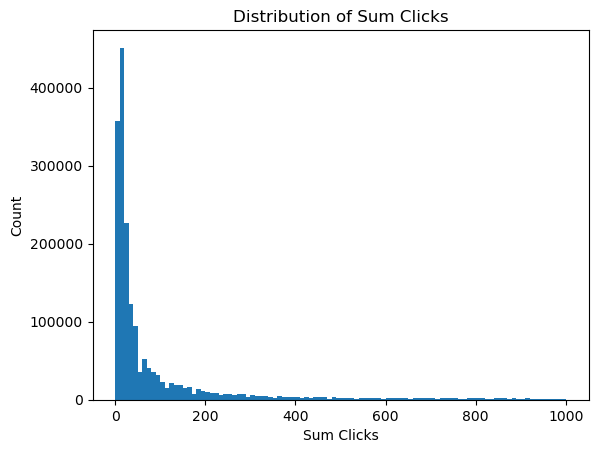

In [12]:
#Distribution of Sum Clicks
plt.hist(grouped_df["sum_click"], bins=100, range=(0, 1000))
plt.title("Distribution of Sum Clicks")
plt.xlabel("Sum Clicks")
plt.ylabel("Count")
plt.show()

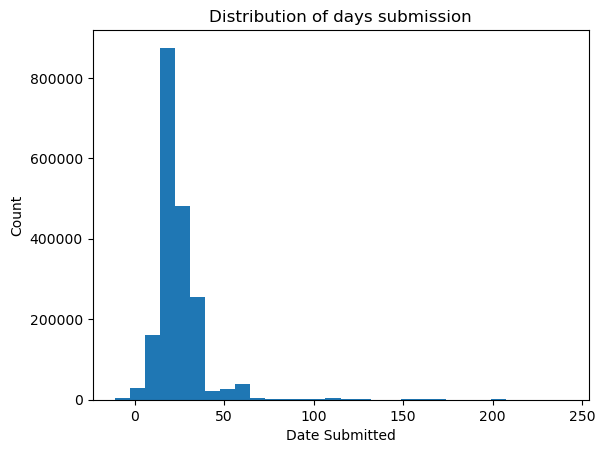

In [20]:
#Distribution of the Days Taken Until Submission
plt.hist(grouped_df["date_submitted"], bins=30)
plt.title("Distribution of days submission")
plt.xlabel("Date Submitted")
plt.ylabel("Count")
plt.show()

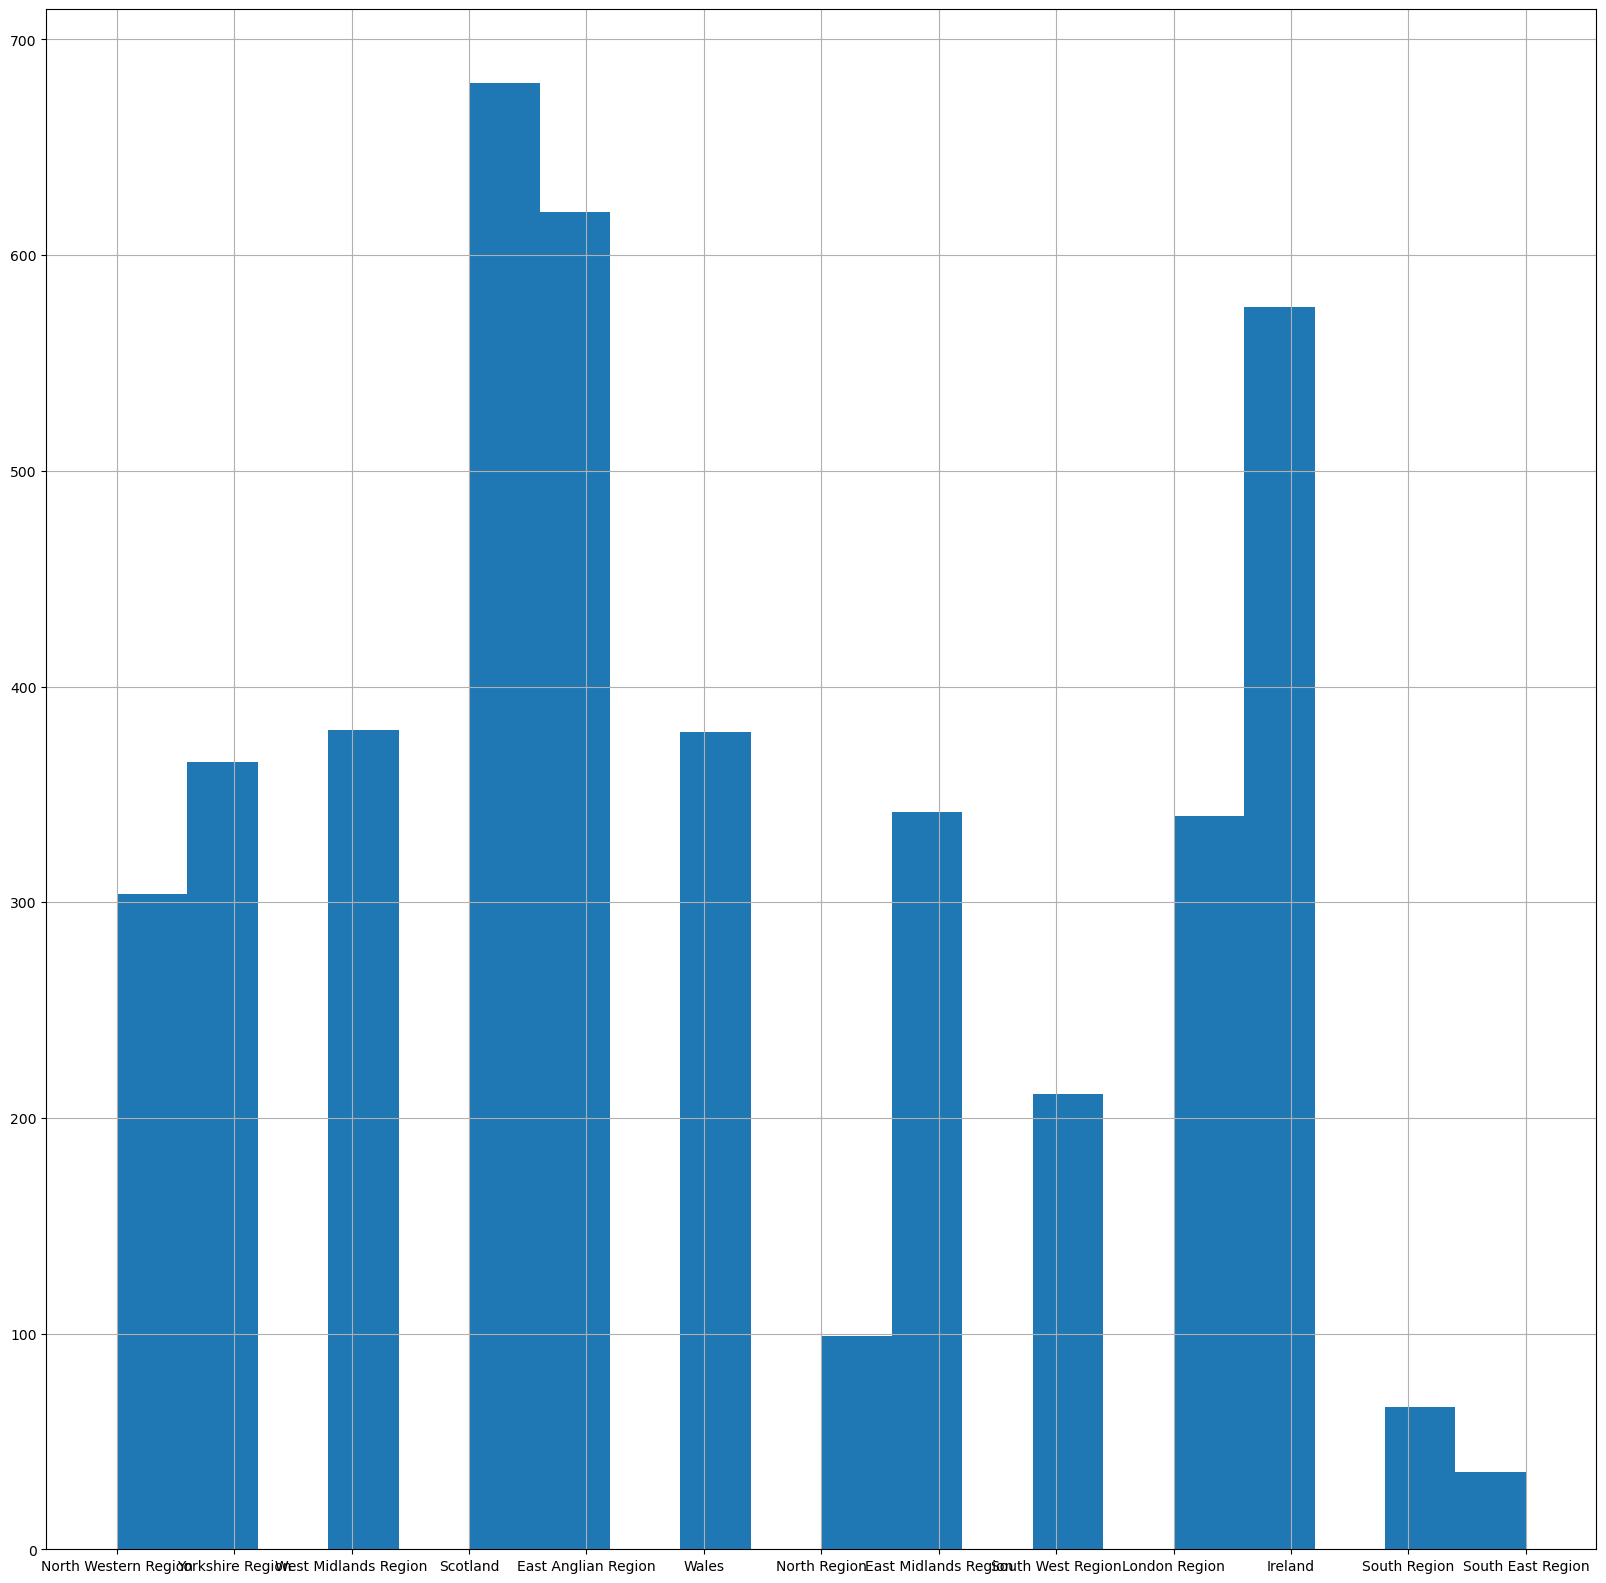

In [28]:
# check chbehom 50000 jeybin 0 score, why ?
score_zero_df = grouped_df[grouped_df['score'] == 0]
#included_cols = ['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'sum_click', 'is_banked', 'date_submitted', 'gender', 'region', 'disability']

score_zero_df["region"].hist(figsize=(20, 20), bins=20)
plt.show()

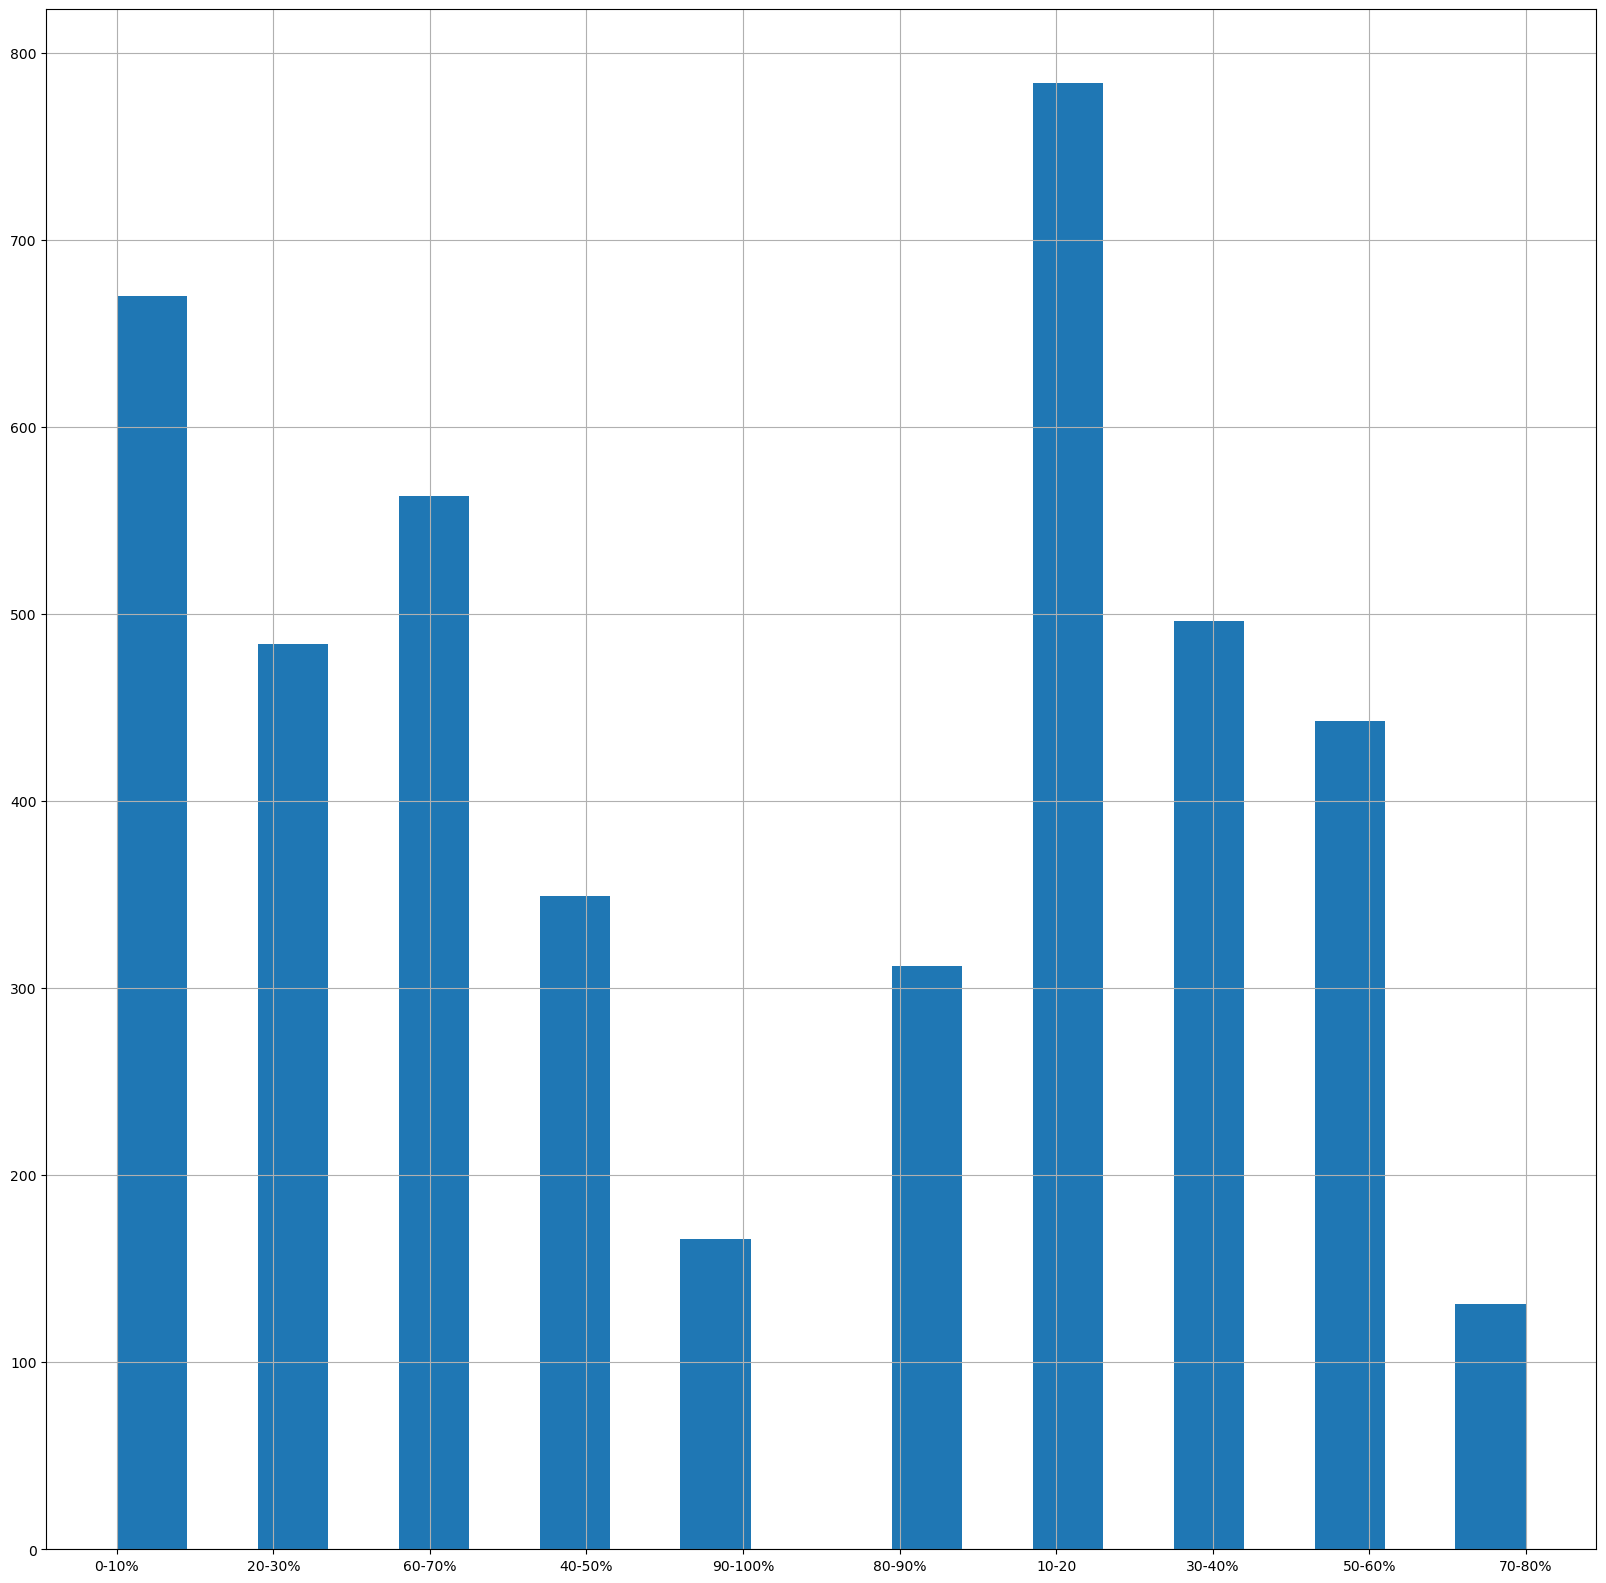

In [29]:
# check chbehom 50000 jeybin 0 score, why ?
score_zero_df = grouped_df[grouped_df['score'] == 0]
#included_cols = ['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'sum_click', 'is_banked', 'date_submitted', 'gender', 'region', 'disability']

score_zero_df["imd_band"].hist(figsize=(20, 20), bins=20)
plt.show()

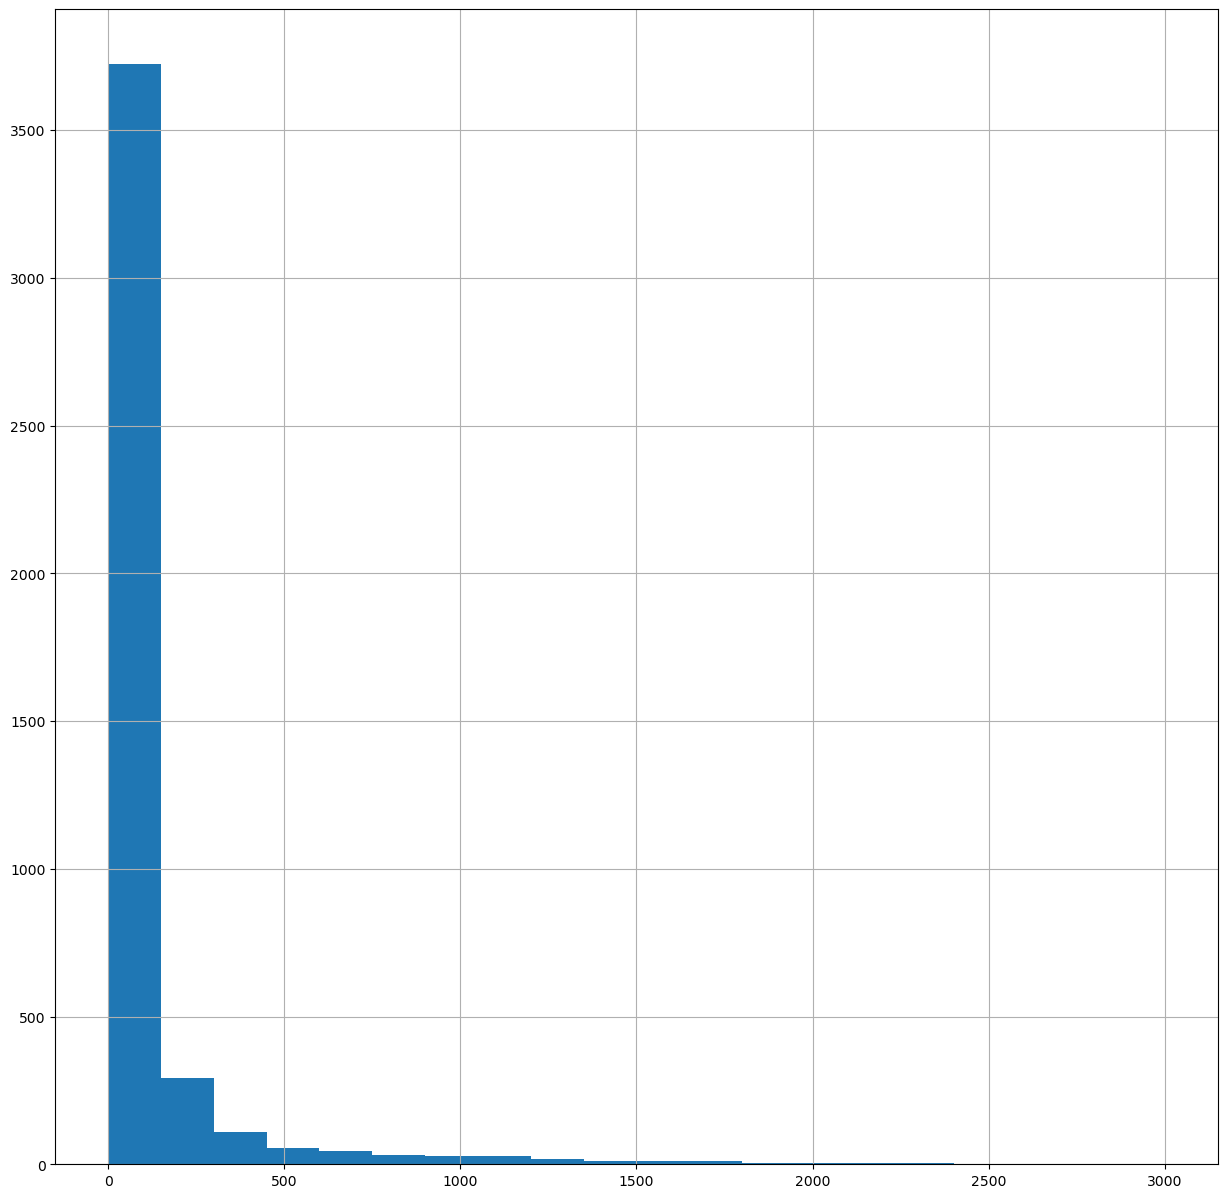

In [35]:
# check chbehom 50000 jeybin 0 score, why ?
score_zero_df = grouped_df[grouped_df['score'] == 0]
#included_cols = ['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'sum_click', 'is_banked', 'date_submitted', 'gender', 'region', 'disability']

score_zero_df["sum_click"].hist(figsize=(15, 15), bins=20, range=(0,3000))
plt.show()

In [ ]:
#checking the distribution of each categorical column using bar plots
categorical_vars = ['highest_education', 'imd_band', 'age_band', 'gender', 'region', 'disability']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, var in enumerate(categorical_vars):
    grouped_df[var].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
#there are extreme values in date_submitted, -11 to 608 , we've set it to 0 & 365
df_cleaned = grouped_df[(grouped_df['date_submitted'] >= 0) & (grouped_df['date_submitted'] <= 365)]

#there is quite a lot of people with 0 score, that would mean that those are mostly not engaged, therefore they'd provide bias in our model so we'll exclude them
df_cleaned = df_cleaned[df_cleaned['score'] > 0]

#drop the observations with missing score values : 352 missing values
df_cleaned.dropna(subset=['score'], inplace=True)

print(df_cleaned.shape)
print(df_cleaned.isnull().sum())

In [ ]:
# Correlation Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Select the columns to include in the correlation analysis
cols = ['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
        'sum_click', 'is_banked', 'date_submitted', 'gender', 'region',
        'disability','score']

# Compute the correlation matrix
corr = df_cleaned[cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## This is data preparation steps

In [ ]:
# LET'S TREAT MISSING VALUES : imd_band 106611 missing values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Define functions for converting between imd_band and percentage
def convert_imd_band(imd_band):
    if imd_band == '0-10%':
        return 0
    elif imd_band == '10-20':
        return 1
    elif imd_band == '20-30%':
        return 2
    elif imd_band == '30-40%':
        return 3
    elif imd_band == '40-50%':
        return 4
    elif imd_band == '50-60%':
        return 5
    elif imd_band == '60-70%':
        return 6
    elif imd_band == '70-80%':
        return 7
    elif imd_band == '80-90%':
        return 8
    elif imd_band == '90-100%':
        return 9


# categorical columns in the data
cat_cols = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'disability']

# Split the data into two parts: one with missing values in imd_band, and another with no missing values
df_missing = df_cleaned[df_cleaned['imd_band'].isna()]
df_not_missing = df_cleaned[~df_cleaned['imd_band'].isna()]

# Split df_not_missing into train and test sets
X_train, X_test, y_train_cat, y_test_cat = train_test_split(df_not_missing.drop('imd_band', axis=1), df_not_missing['imd_band'], test_size=0.2, random_state=42)

# Convert categorical values to numerical values
y_train = y_train_cat.apply(convert_imd_band)
y_test = y_test_cat.apply(convert_imd_band)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# categorical columns in the data
cat_cols = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'age_band', 'disability']

# initialize the encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# fit the encoder on the categorical columns of the training data
encoder.fit(X_train[cat_cols])

# transform the categorical columns of the training and test data
X_train_encoded = encoder.transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])
df_missing_encoded = encoder.transform(df_missing[cat_cols])

# get the names of the encoded columns
cat_col_names = encoder.get_feature_names_out(cat_cols)

# concatenate the encoded columns with the non-categorical columns
X_train_processed = np.concatenate((X_train_encoded, X_train.drop(cat_cols, axis=1)), axis=1)
X_test_processed = np.concatenate((X_test_encoded, X_test.drop(cat_cols, axis=1)), axis=1)
df_missing_processed = np.concatenate((df_missing_encoded, df_missing.drop(cat_cols + ['imd_band'], axis=1)), axis=1)

# print the first five rows of the processed training data
print(X_train_processed[:5])
# print the column names of the processed training data
col_names = np.concatenate((cat_col_names, X_train.drop(cat_cols, axis=1).columns))
print(col_names)



df_missing_processed_df = pd.DataFrame(data=df_missing_processed, columns=col_names)
df_missing_processed_df.head(300)




##      import pandas as pd
##      loaded_data = pd.read_csv('df_full_cleaned_predicted_imdband')
##      
##      demo_features = ['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'studied_credits', 'disability']
##      perf_features = ['code_module', 'code_presentation', 'id_assignment', 'score', 'is_banked', 'num_of_prev_attempts', 'final_result']
##      
##      additional_demo_data = pd.read_csv('studentInfo.csv')
##      
##      added_features = additional_demo_data[['id_student', 'code_module', 'code_presentation', 'final_result', 'studied_credits']]
##      
##      added_features = pd.get_dummies(added_features, columns=['code_module', 'code_presentation'], prefix=['code_module', 'code_presentation'])
##      # Merge the student information data with the original DataFrame
##      demopref_data = pd.merge(loaded_data, added_features, on=['id_student', 'code_presentation_2013B','code_presentation_2013J','code_presentation_2014B','code_presentation_2014J', 'code_module_AAA','code_module_BBB','code_module_CCC','code_module_DDD','code_module_EEE','code_module_FFF','code_module_GGG' ] )
##      
##      # Drop the irrelevant columns
##      demopref_data.drop(['sum_click', 'id_site'], axis=1, inplace=True)
##      demopref_data = pd.get_dummies(demopref_data, columns=['final_result'], prefix='final_result')
##      demopref_data['id_student'] = demopref_data['id_student'].astype(int)
##      demopref_data['id_assessment'] = demopref_data['id_assessment'].astype(int)

In [ ]:
n_samples, n_features = X_train_encoded.shape
n_samples, n_features_processed = X_train_processed.shape
print(f"Training set contains {n_samples} samples and {n_features} features.")

In [ ]:
# concatenate the processed training and test data
X_processed = np.concatenate((X_train_processed, X_test_processed), axis=0)
X_processed_df = pd.DataFrame(X_processed, columns=col_names)

y_processed = np.concatenate((y_train, y_test), axis=0)

# concatenate the original non-missing data and the processed missing data
df_not_missing_processed = pd.concat([X_processed_df, pd.DataFrame(data=y_processed, columns=['imd_band'])], axis=1)

In [ ]:
print(X_train_processed.shape)

## USER-ITEM MATRIX : Relevant Features : code_module,code_presentation,id_student,id_site,activity_type,date,sum_click

In [ ]:
import pandas as pd
student_info = pd.read_csv('studentInfo.csv')
student_vle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')


U_I_student_info = student_info[['code_module', 'code_presentation', 'id_student']]
U_I_student_vle = student_vle[['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click']]
U_I_vle = vle[['id_site','activity_type']]

In [ ]:
U_I_merged_df = pd.merge(U_I_student_info, U_I_student_vle, on=['code_module', 'code_presentation', 'id_student'], how='inner')
U_I_merged_df = pd.merge(U_I_merged_df, U_I_vle, on=['id_site'], how='inner')

In [ ]:
# User-item matrix : sum_click || we're also using aggfunc='sum' to group by basically
user_item_matrix = pd.pivot_table(U_I_merged_df, values='sum_click', index='id_student', columns='id_site', aggfunc='sum', fill_value=0)

## DEMOGRAPHICS + PERFORMANCE Based Classification

In [ ]:
import pandas as pd
loaded_data = pd.read_csv('df_full_cleaned_predicted_imdband')

demo_features = ['id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'studied_credits', 'disability']
perf_features = ['code_module', 'code_presentation', 'id_assignment', 'score', 'is_banked', 'num_of_prev_attempts', 'final_result']

additional_demo_data = pd.read_csv('studentInfo.csv')

added_features = additional_demo_data[['id_student', 'code_module', 'code_presentation', 'final_result', 'studied_credits']]

added_features = pd.get_dummies(added_features, columns=['code_module', 'code_presentation'], prefix=['code_module', 'code_presentation'])
# Merge the student information data with the original DataFrame
demopref_data = pd.merge(loaded_data, added_features, on=['id_student', 'code_presentation_2013B','code_presentation_2013J','code_presentation_2014B','code_presentation_2014J', 'code_module_AAA','code_module_BBB','code_module_CCC','code_module_DDD','code_module_EEE','code_module_FFF','code_module_GGG' ] )

# Drop the irrelevant columns
demopref_data.drop(['sum_click', 'id_site'], axis=1, inplace=True)
demopref_data = pd.get_dummies(demopref_data, columns=['final_result'], prefix='final_result')
demopref_data['id_student'] = demopref_data['id_student'].astype(int)
demopref_data['id_assessment'] = demopref_data['id_assessment'].astype(int)
